In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


The irragular growth of the breast cells leads to *breast cancer*. Due to the mutation in the gene, the cells start growing in an uncontrolled way. Those uncntrolled growth or tumers could be visualized through the mammogram. According to the study all irregular growths are not cancer. From the mammogram the tumer size, texture etc could be analyzed to classify the cancerous cells.
In this note book a breast cancer data set has been analyzed. The data set comprises the numerical values derived from the mammogram. 

# Load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# Exploratory Data Analysis

In [6]:
data.nunique()

mean_radius        456
mean_texture       479
mean_perimeter     522
mean_area          539
mean_smoothness    474
diagnosis            2
dtype: int64

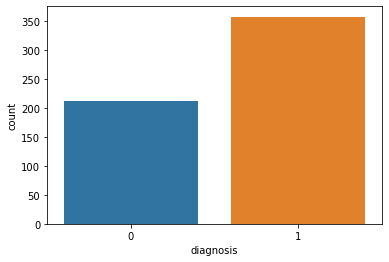

In [7]:
import seaborn as sns
sns.countplot(x="diagnosis", data=data)

In [8]:
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

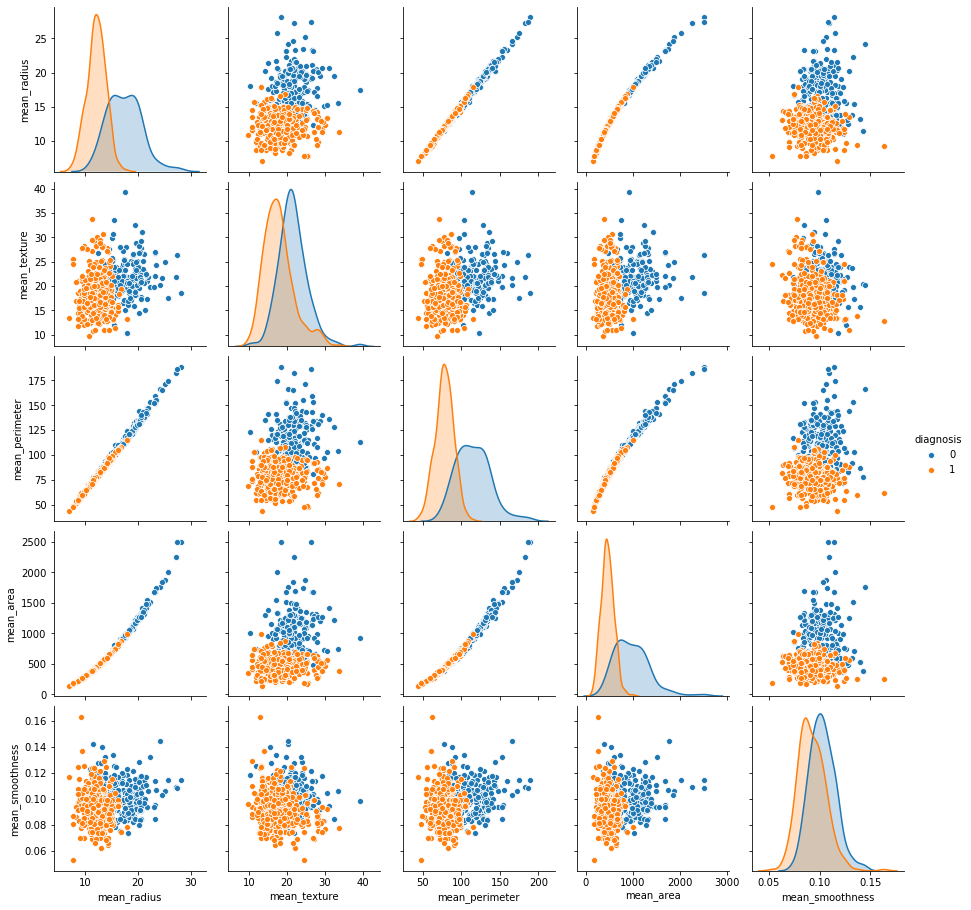

In [9]:
sns.pairplot(data, hue="diagnosis")

The data set contains the features:
* mean_radius
* mean_texture
* mean_perimeter
* mean_area
* mean_smoothness
* diagnosis (0=positive and 1=negative)

We are having 2 classes here to train our model to learn whether a tumor is cancerous or not. The model prediction and accuracy completely depends on the involved feature set. 
From the pair plot we can visualize that the cancerou and noncancerous tumarous showing diffrent features and in some cases the features are coinsiding i.e. showing indistinguishable feature values.

# Classification

In [10]:
X= data.iloc[:,:5].values
y= data.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
y_pred=neigh.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



[Text(217.87697368421055, 206.56799999999998, 'X[3] <= 696.25\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(139.1328947368421, 184.824, 'X[2] <= 90.115\ngini = 0.22\nsamples = 397\nvalue = [50, 347]'),
 Text(82.96578947368421, 163.07999999999998, 'X[4] <= 0.109\ngini = 0.129\nsamples = 332\nvalue = [23, 309]'),
 Text(36.71052631578948, 141.336, 'X[1] <= 19.615\ngini = 0.067\nsamples = 287\nvalue = [10, 277]'),
 Text(11.747368421052633, 119.592, 'X[4] <= 0.1\ngini = 0.01\nsamples = 206\nvalue = [1, 205]'),
 Text(5.873684210526316, 97.848, 'gini = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(17.621052631578948, 97.848, 'X[4] <= 0.1\ngini = 0.039\nsamples = 50\nvalue = [1, 49]'),
 Text(11.747368421052633, 76.10399999999998, 'X[1] <= 18.52\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.873684210526316, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(17.621052631578948, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.494736842

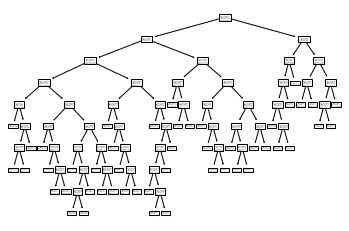

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf) 

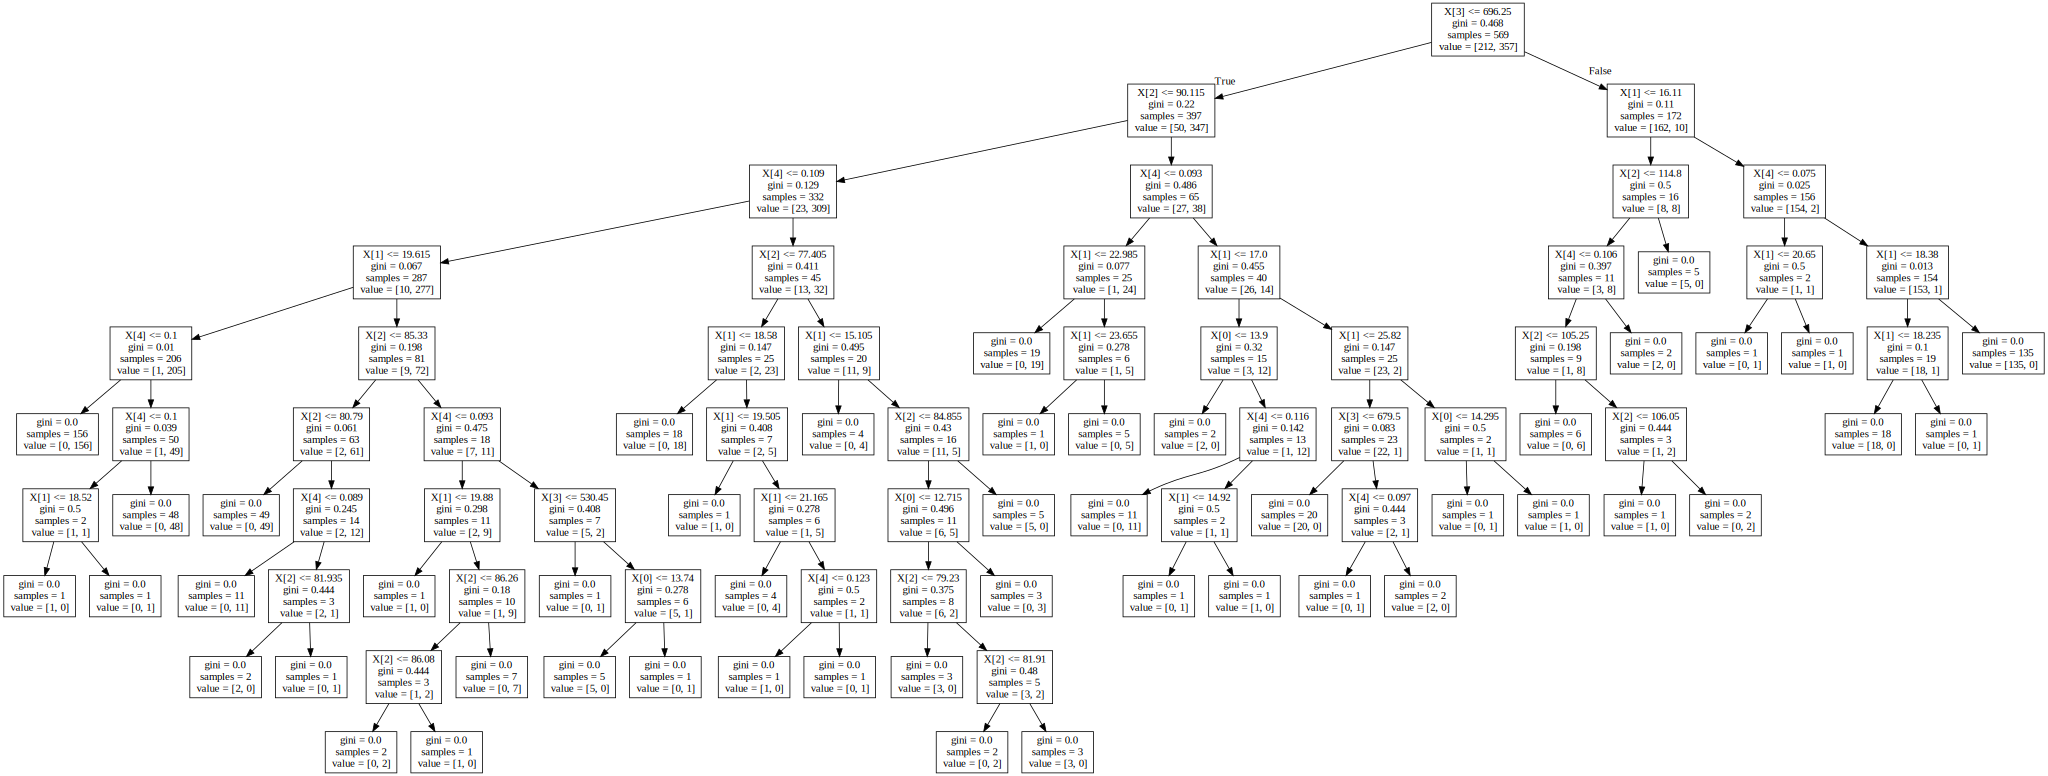

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [17]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        90

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

